In [77]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_515b955e13c948768e22ad867b8275d6 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_515b955e13c948768e22ad867b8275d6 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_515b955e13c948768e22ad867b8275d6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ri_rJYnmFfAtfPvPnEmD-UMYvj-2ZkbfMQiBx7S7fOA9',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_515b955e13c948768e22ad867b8275d6)

body = client_515b955e13c948768e22ad867b8275d6.get_object(Bucket='ibmbankingproject-donotdelete-pr-5yw0lmivhturjd',Key='bank.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# EDA

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Data Description: 

- age: age of the client
- job: client's occupation (categorical)
- marital: client's marital status (categorical) 
- education: client' education level (categorical) 
- default: if client has credit in default (yes/no value) 
- balance: avg yearly balance (numeric) 
- housing: Does client has a housing loan? (Yes/No)
- loan: does client has a personal loan (Yes/No) 
- contact: type of communication contact (categorical) 
- day: day of last contact with client 
- month: month of last contact with client (categorical) 

- duration: Duration of last contact with clients (numeric), this is for benchmark purposes only, not reliable for predictive modeling
- campaign: # of contacts performed dring this campaign 
- pdays: # of days passed client was last contacted, (-1) means not previously contacted (numeric)
- previous: # of client contacts performed before this campaign (numeric)
- poutcome: previous marketing campaign outcome (categorical)
- deposit: Target variable

In [80]:
df.apply(lambda x: sum(x.isnull()), axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [81]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


VISUALIZE DATA 

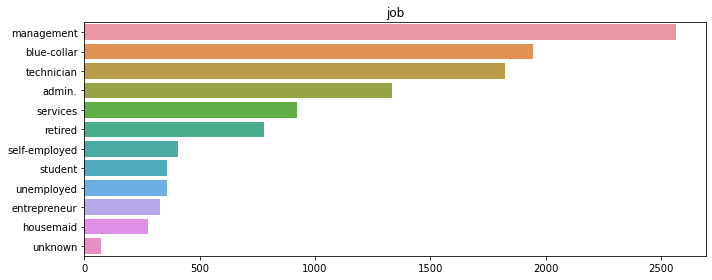

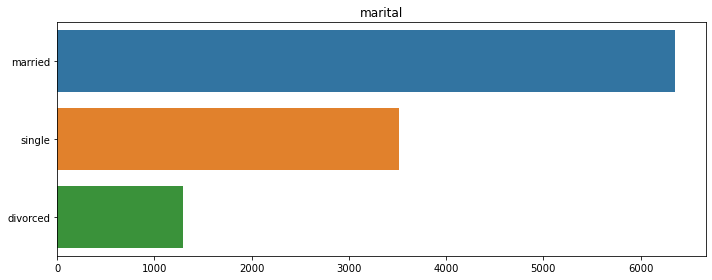

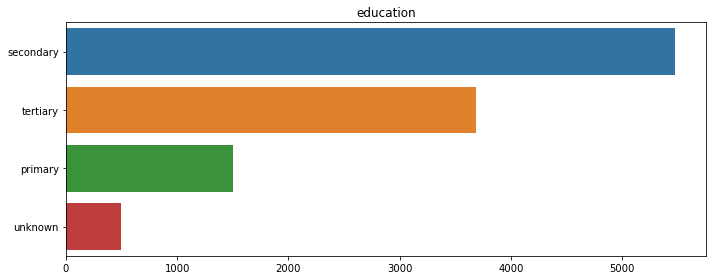

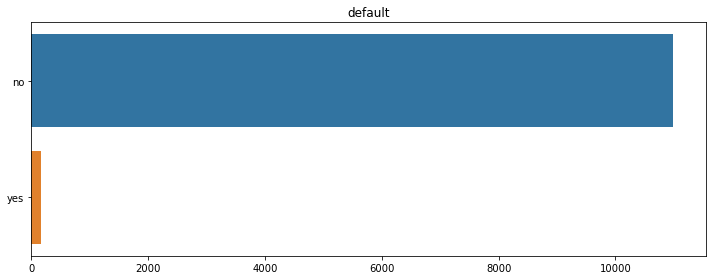

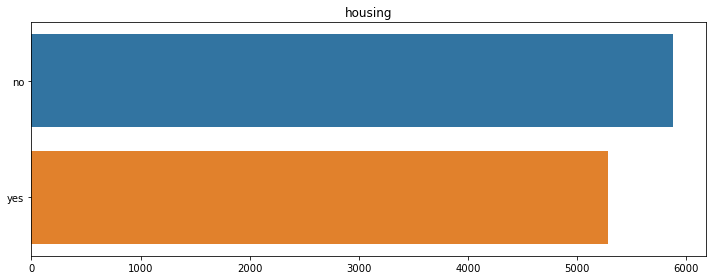

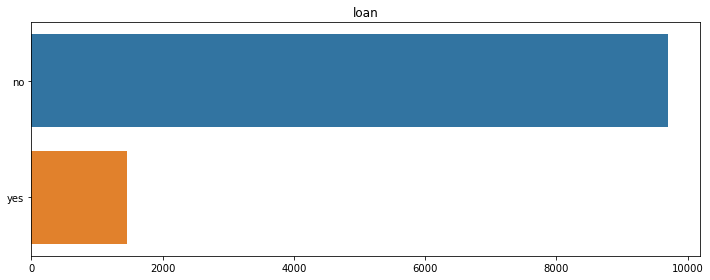

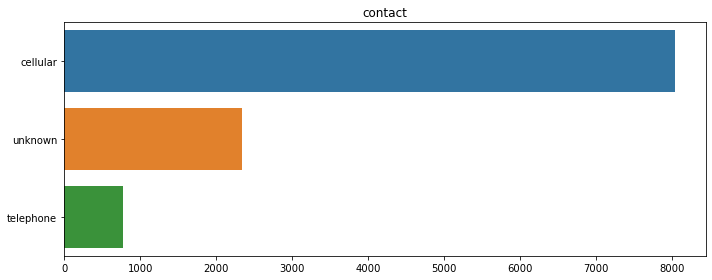

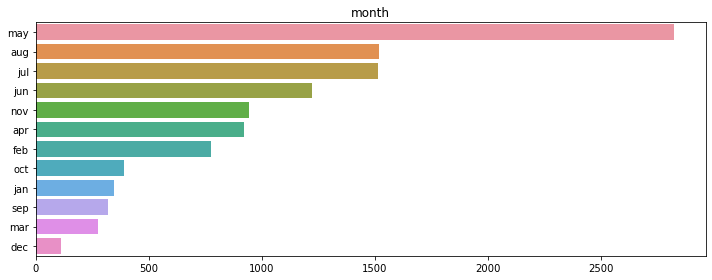

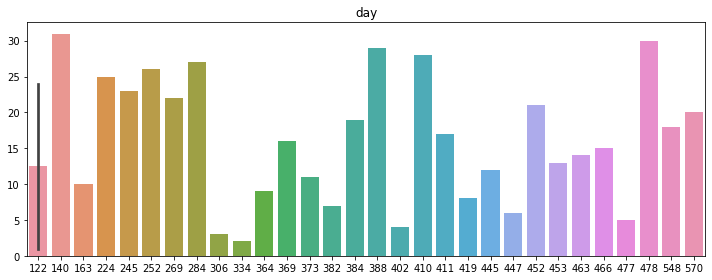

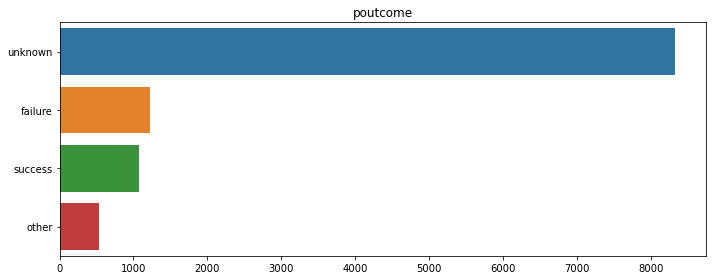

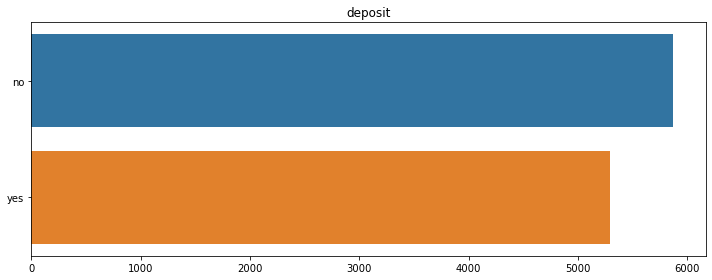

In [82]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day', 'poutcome','deposit']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [83]:
# Check target variable distribution (Deposit)
count = df.groupby('deposit').size()
percent = count/len(df)*100
print(percent)

deposit
no     52.616019
yes    47.383981
dtype: float64


## Job Attribute

In [84]:
df_job=df[["job","deposit"]]
df_job.describe()

,job,deposit
count,11162,11162
unique,12,2
top,management,no
freq,2566,5873


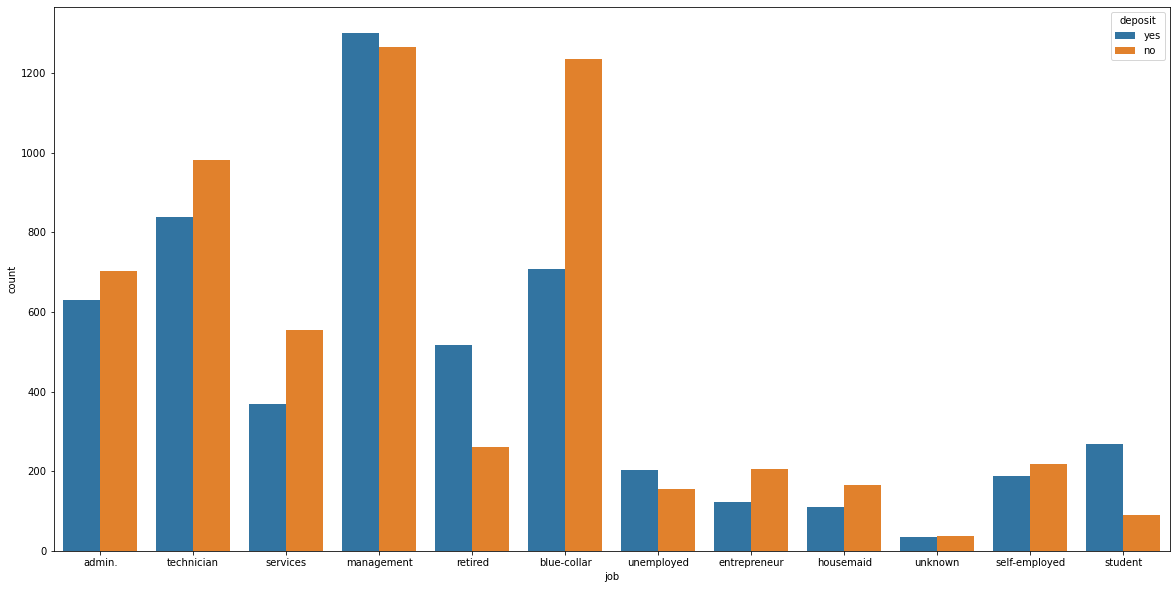

In [85]:
plt.figure(figsize=(20,10))
sns.countplot(x="job",hue="deposit",data=df)
plt.show()

- Highest deposit customer rate belongs to Student and Retired
- Customers with 'blue-collor' and 'services' are less likely to subcribe for term deposit. 

## Marital attribute 

In [86]:
df_marital = df[['marital', 'deposit']]
df_marital.describe()

,marital,deposit
count,11162,11162
unique,3,2
top,married,no
freq,6351,5873


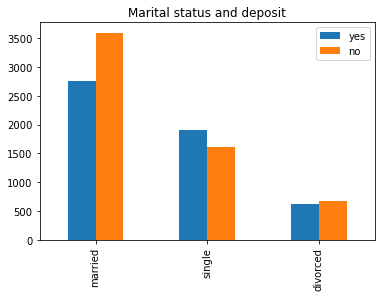

In [87]:
#marital status and deposit
job_df = pd.DataFrame()

job_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
job_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

job_df.plot.bar(title = 'Marital status and deposit')

## Education attribute

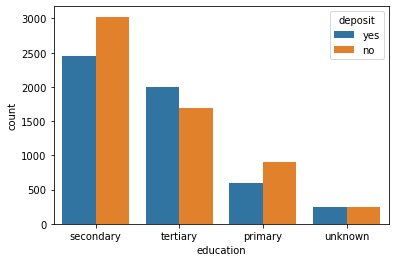

In [88]:
sns.countplot(x="education",hue="deposit",data=df)
plt.show()

## Default attribute

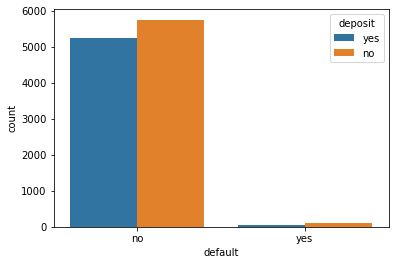

In [89]:
sns.countplot(x="default",hue="deposit",data=df)
plt.show()

Default is one of the most important variables for analysing credit customers. But in this dataset its look like no relation to deposit

## Housing attribute

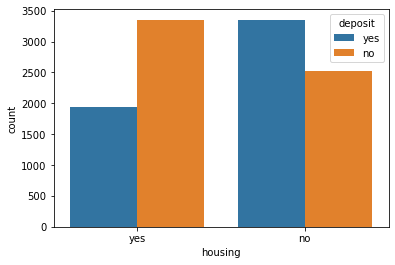

In [90]:
sns.countplot(x="housing",hue="deposit",data=df)
plt.show()

- Clients who have housing loan seems don't have term deposit. 
- One important attribute to model 

## Loan attribute

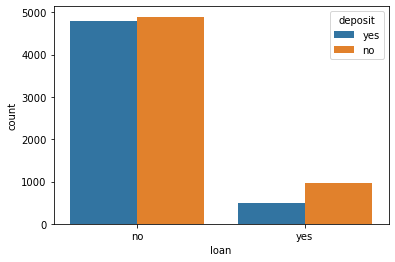

In [91]:
sns.countplot(x="loan",hue="deposit",data=df)
plt.show()

Loan category not as much correlated with deposit as housing

## Contact attribute

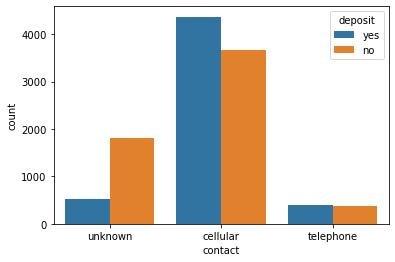

In [92]:
sns.countplot(x="contact", hue = "deposit", data=df)
plt.show()

## Month attribute

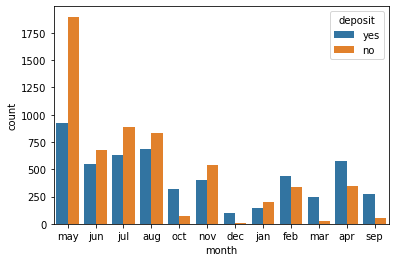

In [93]:
# last contact month
sns.countplot(x="month",hue="deposit",data=df)
plt.show()

## poutcome attribute

poutcome
failure    11.001613
other       4.810966
success     9.595055
unknown    74.592367
dtype: float64


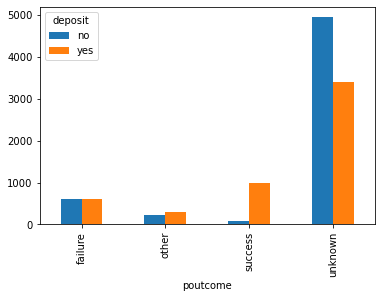

In [94]:
# "poutcome"
p_outcome = pd.crosstab(df['poutcome'], df['deposit'])
p_outcome.plot(kind='bar')
print(df.groupby(['poutcome']).size()/len(df)*100)

"poutcome" also have more than 74% missing values so we can drop this variable later

# NUMERICAL VISUALIZATION

## Age attribute

In [95]:
df_age=df[["age","deposit"]]
df_age.describe()

,age
count,11162.000000
mean,41.231948
std,11.913369
min,18.000000
25%,32.000000
50%,39.000000
75%,49.000000
max,95.000000


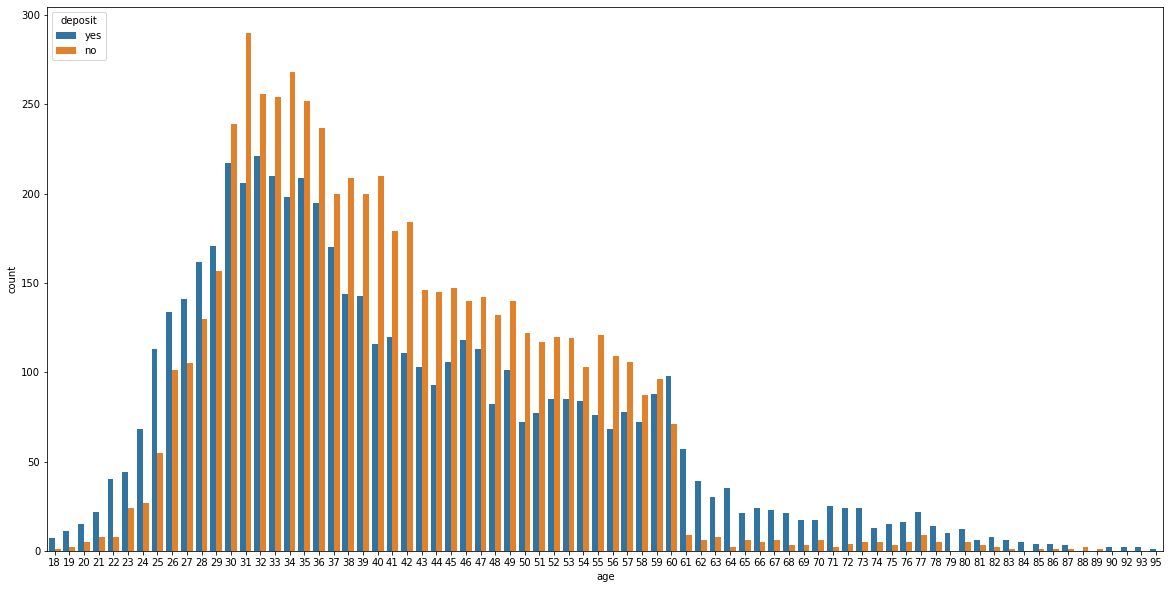

In [96]:
plt.figure(figsize=(20,10))
sns.countplot("age",data=df,hue="deposit")
plt.show()

Text(0, 0.5, 'balance')

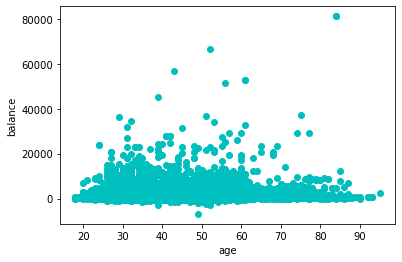

In [97]:
plt.scatter(df["age"],df["balance"],color="c")
plt.xlabel("age")
plt.ylabel("balance")

- For the age out of 30-60 range, the customers term deposit ratio significantly increases
- Age will be chosen as an important feature in all models

## Other attributes

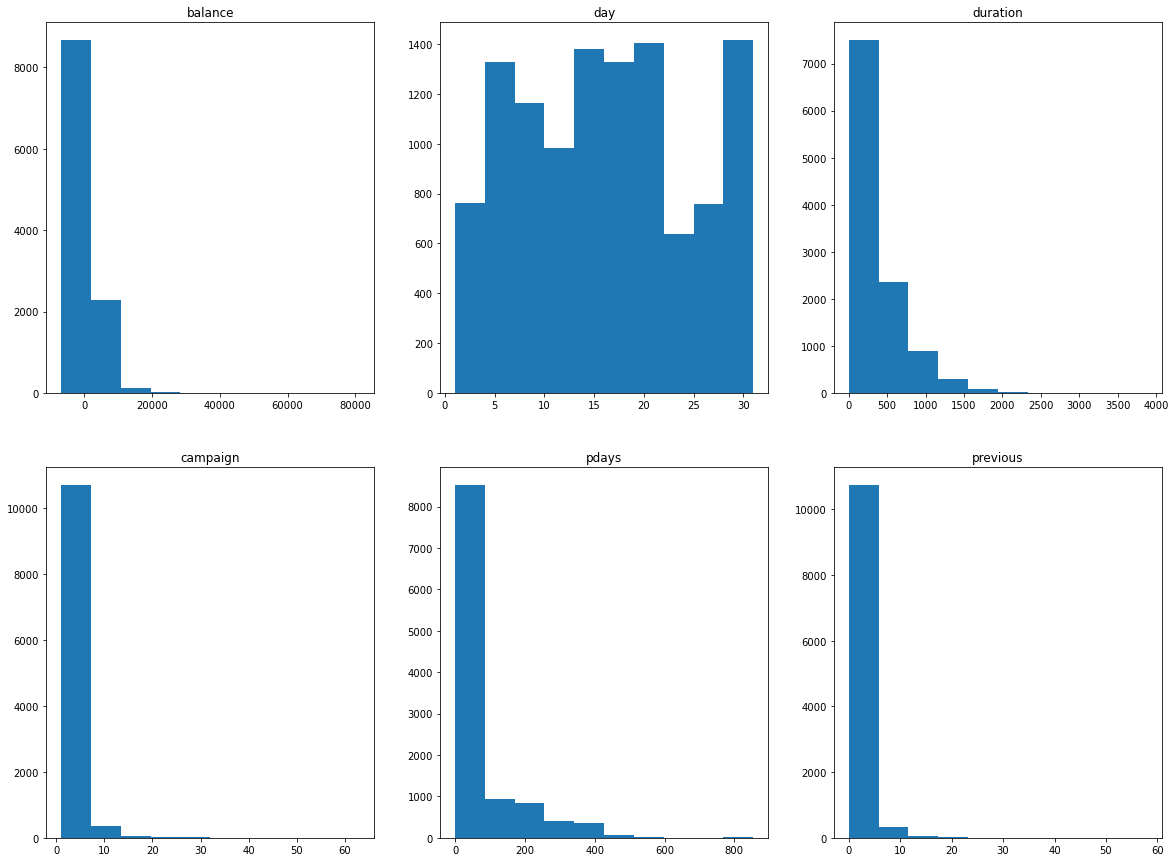

In [98]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

- Numerical columns have outliers (pdays, campaign, previous). 
- Predict they are noisy data, then I will visualize closer to decide how can I manage the outlier. 

## Data Transformation

In [99]:
df['default'].replace(['yes','no'],[1,0],inplace=True)
df['housing'].replace(['yes','no'],[1,0],inplace=True)
df['loan'].replace(['yes','no'],[1,0],inplace=True)
df['deposit'].replace(['yes','no'],[1,0],inplace=True)


## Check the correlation

In [100]:
df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


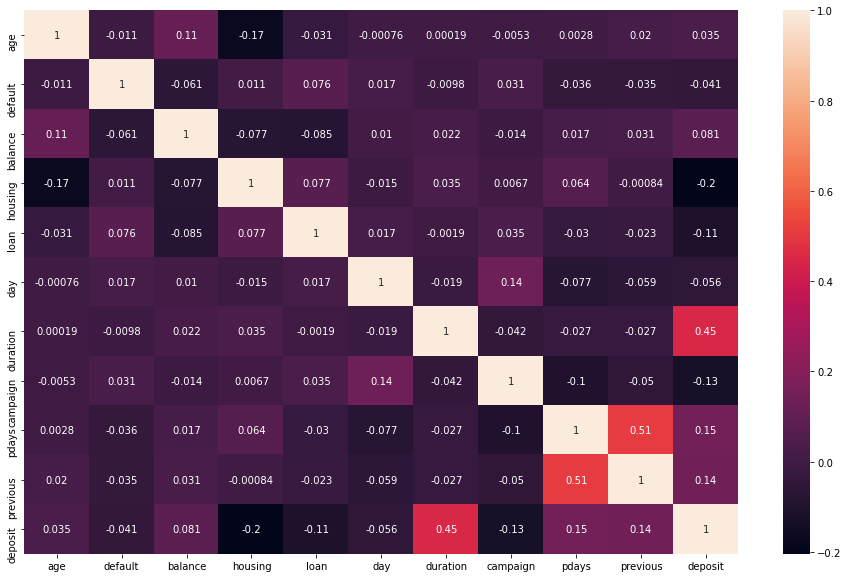

In [101]:
plt.figure(figsize=(16, 10))

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [102]:
df["pdays"].replace(-1,int(0),inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,0,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,0,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,0,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,0,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,0,0,unknown,1


In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df.iloc[:,2]=le.fit_transform(df.iloc[:,2])
df.iloc[:,3]=le.fit_transform(df.iloc[:,3])
df.iloc[:,8]=le.fit_transform(df.iloc[:,8])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])
df.iloc[:,15]=le.fit_transform(df.iloc[:,15])


In [104]:
X = df.drop(columns = ['day','deposit'])
Y = df['deposit']

In [105]:
X

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,8,1042,1,0,0,3
1,56,0,1,1,0,45,0,0,2,8,1467,1,0,0,3
2,41,9,1,1,0,1270,1,0,2,8,1389,1,0,0,3
3,55,7,1,1,0,2476,1,0,2,8,579,1,0,0,3
4,54,0,1,2,0,184,0,0,2,8,673,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,0,257,1,0,0,3
11158,39,7,1,1,0,733,0,0,2,6,83,4,0,0,3
11159,32,9,2,1,0,29,0,0,0,1,156,2,0,0,3
11160,43,9,1,1,0,0,0,1,0,8,9,2,172,5,0


# Data preprocessing

In [106]:
from sklearn import preprocessing 
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
min_max.fit(X).transform(X)

array([[0.53246753, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.49350649, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.2987013 , 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.18181818, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.81818182, 0.5       , ..., 0.20140515, 0.0862069 ,
        0.        ],
       [0.20779221, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

# Train-test split

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [108]:
X_train_std = min_max.fit_transform(X_train)
X_test_std = min_max.transform(X_test)

# BUILDING MODEL

## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [111]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [112]:
from sklearn.model_selection import cross_val_score,cross_val_predict

model_acc = cross_val_score(model, X_train_std, Y_train, cv=3, scoring='accuracy', n_jobs=-1)
model_proba = cross_val_predict(model, X_train_std, Y_train, cv=3, method='predict_proba')


In [113]:
prediction = model.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)

0.7877295118674429

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, prediction)
print(confusion_matrix)


[[937 229]
 [245 822]]


## Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [130]:
dt_clf_acc = cross_val_score(dt_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dt_clf_proba = cross_val_predict(dt_clf, X_train_std, Y_train, cv=3, method='predict_proba')
dt_clf_scores = dt_clf_proba[:, 1] 

In [131]:
dt_clf_acc

array([0.76990259, 0.75739247, 0.7718414 ])

In [132]:
Y_pred=dt_clf.predict(X_test)

In [134]:
acc_dt_clf = accuracy_score(Y_test,Y_pred) * 100

In [135]:
acc_dt_clf

76.13076578593821

## SVM Model

In [116]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',probability = True)
clf_classifier = clf.fit(X_train,Y_train)

In [117]:
#Cross validation score for SVC
clf_acc = cross_val_score(clf_classifier, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
clf_proba = cross_val_predict(clf_classifier, X_train_std, Y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1]

In [118]:
#Predict on test data
Y_clf_pred=clf_classifier.predict(X_test)

In [119]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_clf = accuracy_score(Y_test,Y_clf_pred) * 100


In [120]:
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_clf_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_clf_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_clf_pred) * 100))
print(confusion_matrix(Y_test, Y_clf_pred))


Accuracy score: 72.592924
Recall score : 63.917526
ROC score : 72.224629

[[939 227]
 [385 682]]


## Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier()

In [122]:
rf_cl.fit(X_train, Y_train)

RandomForestClassifier()

In [124]:
# Cross validation

rf_cl_acc = cross_val_score(rf_cl, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rf_cl_proba = cross_val_predict(rf_cl, X_train_std, Y_train, cv=3, method='predict_proba')
rf_cl_scores = rf_cl_proba[:, 1]
rf_cl_acc

array([0.8367484 , 0.83870968, 0.83837366])

In [125]:
#Predict on test data
pred_2 = rf_cl.predict(X_test)

In [127]:
acc_rf_cl = accuracy_score(Y_test, pred_2) * 100

In [128]:
acc_rf_cl

82.17644424540977

# Compare the models

In [142]:

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))

In [143]:
from sklearn import model_selection

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train_std, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.792700 (0.014426)
Decision Tree: 0.774776 (0.014332)
SVM: 0.804569 (0.015338)
Random Forest: 0.842087 (0.009587)


[Text(0, 0, 'LR'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'Random Forest')]

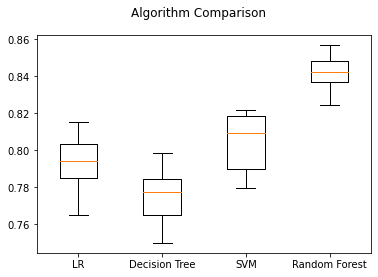

In [144]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# DEPLOYMENT

In [145]:
api_key = 'MXLAaLoGevy_j07jEzGmvL7hHajUKQ8WbmzMs24PT6vN'
location = 'eu-gb'

In [146]:
wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

In [62]:
!pip install -U ibm-watson-machine-learning

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: ibm-watson-machine-learning in /opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages (1.0.165)


In [147]:
from ibm_watson_machine_learning import APIClient
client = APIClient(wml_credentials)

In [148]:
space_id = '3913d1f0-a1d0-4888-97d4-fb2dd543aeb7'

In [149]:
client.spaces.list(limit=10)

------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
3913d1f0-a1d0-4888-97d4-fb2dd543aeb7  IBM_Banking_Project  2021-10-19T11:01:15.550Z
1baf5853-f012-4a68-89ab-a593d3e56ef0  Banking Analysis     2021-10-18T10:25:49.238Z
------------------------------------  -------------------  ------------------------


In [150]:
client.set.default_space(space_id)

'SUCCESS'

In [151]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [152]:
metadata = {
    client.repository.ModelMetaNames.NAME: "Banking Model - RandomForest",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid,
}

In [153]:
model_details = client.repository.store_model(rf_cl, metadata)

In [154]:
# Extract the uid.
model_uid = client.repository.get_model_uid(model_details)
print(model_uid)

ad90dfed-9122-4e82-80e0-0e748232fac0


In [157]:
# Create the deployment.
meta_props = {
    client.deployments.ConfigurationMetaNames.NAME: "Predict customer deposit'",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

deployment_details = client.deployments.create(model_uid,meta_props)



#######################################################################################

Synchronous deployment creation for uid: 'ad90dfed-9122-4e82-80e0-0e748232fac0' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='aeb91c51-b8d9-4be5-8e4b-b1ee39df2ac9'
------------------------------------------------------------------------------------------------




In [158]:
# List the deployments.
client.deployments.list(limit=10)

------------------------------------  --------------------------------  -----  ------------------------
GUID                                  NAME                              STATE  CREATED
aeb91c51-b8d9-4be5-8e4b-b1ee39df2ac9  Predict customer deposit'         ready  2021-10-20T10:23:41.001Z
5de53b99-90d9-47e9-b1ef-540bc399eee2  Predict customer's deposit term'  ready  2021-10-20T10:22:51.003Z
58dcefb1-1b5e-449e-b9f6-9ddeb33745ee  IBM_Banking_Deployment            ready  2021-10-19T11:12:55.906Z
d7a4ccdf-48b4-4a5b-ba24-8df5a19830bc  Predict customer's deposit term'  ready  2021-10-19T11:10:18.375Z
------------------------------------  --------------------------------  -----  ------------------------


In [159]:
import json

deployment_uid = client.deployments.get_uid(deployment_details)
print(json.dumps(client.deployments.get_details(deployment_uid), indent=2))

{
  "entity": {
    "asset": {
      "id": "ad90dfed-9122-4e82-80e0-0e748232fac0"
    },
    "custom": {},
    "deployed_asset_type": "model",
    "hardware_spec": {
      "id": "Not_Applicable",
      "name": "S",
      "num_nodes": 1
    },
    "name": "Predict customer deposit'",
    "online": {},
    "space_id": "3913d1f0-a1d0-4888-97d4-fb2dd543aeb7",
    "status": {
      "online_url": {
        "url": "https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/aeb91c51-b8d9-4be5-8e4b-b1ee39df2ac9/predictions"
      },
      "serving_urls": [
        "https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/aeb91c51-b8d9-4be5-8e4b-b1ee39df2ac9/predictions"
      ],
      "state": "ready"
    }
  },
  "metadata": {
    "created_at": "2021-10-20T10:23:41.001Z",
    "id": "aeb91c51-b8d9-4be5-8e4b-b1ee39df2ac9",
    "modified_at": "2021-10-20T10:23:41.001Z",
    "name": "Predict customer deposit'",
    "owner": "IBMid-6630029EI6",
    "space_id": "3913d1f0-a1d0-4888-97d4-fb2dd543aeb7"
  },
  "system": 

In [160]:
deployment_id = client.deployments.get_id(deployment_details)
deployment_id

'aeb91c51-b8d9-4be5-8e4b-b1ee39df2ac9'